In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
books = pd.read_csv('./CSV-data/Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users = pd.read_csv('./CSV-data/Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
ratings = pd.read_csv('./CSV-data/Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


(1149780, 3)
['userID', 'ISBN', 'bookRating']


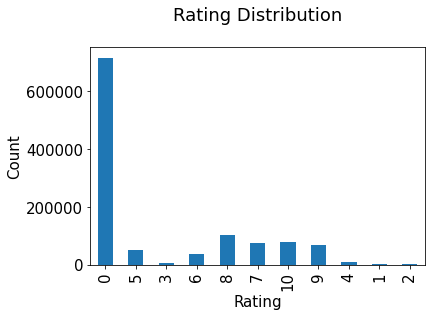

(271360, 8)
['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
(278858, 3)
['userID', 'Location', 'Age']


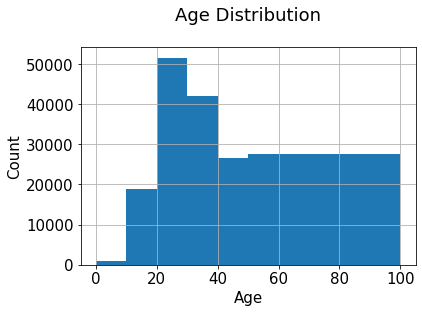

In [4]:
print(ratings.shape)
print(list(ratings.columns))
plt.rc("font", size=15)
ratings.bookRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()
print(books.shape)
print(list(books.columns))
print(users.shape)
print(list(users.columns))
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('system2.png', bbox_inches='tight')
plt.show()

In [5]:
combine_book_rating = pd.merge(ratings, books, on='ISBN')
columns = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

userID        ISBN  bookRating             bookTitle
0  276725  034545104X           0  Flesh Tones: A Novel
1    2313  034545104X           5  Flesh Tones: A Novel
2    6543  034545104X           0  Flesh Tones: A Novel
3    8680  034545104X           5  Flesh Tones: A Novel
4   10314  034545104X           9  Flesh Tones: A Novel

In [6]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])
book_ratingCount = (combine_book_rating.
groupby(by = ['bookTitle'])['bookRating'].
count().
reset_index().
rename(columns = {'bookRating': 'totalRatingCount'})
[['bookTitle', 'totalRatingCount']]
)
book_ratingCount.head()

bookTitle  totalRatingCount
0   A Light in the Storm: The Civil War Diary of ...                 4
1                              Always Have Popsicles                 1
2               Apple Magic (The Collector's series)                 1
3   Ask Lily (Young Women of Faith: Lily Series, ...                 1
4   Beyond IBM: Leadership Marketing and Finance ...                 1

In [7]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')
rating_with_totalRatingCount.head()

userID        ISBN  bookRating             bookTitle  totalRatingCount
0  276725  034545104X           0  Flesh Tones: A Novel                60
1    2313  034545104X           5  Flesh Tones: A Novel                60
2    6543  034545104X           0  Flesh Tones: A Novel                60
3    8680  034545104X           5  Flesh Tones: A Novel                60
4   10314  034545104X           9  Flesh Tones: A Novel                60

In [8]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

count   241071.000
mean         4.277
std         16.739
min          1.000
25%          1.000
50%          1.000
75%          3.000
max       2502.000
Name: totalRatingCount, dtype: float64


In [9]:
print(book_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.900    7.000
0.910    8.000
0.920    9.000
0.930   10.000
0.940   11.000
0.950   13.000
0.960   16.000
0.970   20.000
0.980   29.000
0.990   50.000
Name: totalRatingCount, dtype: float64


In [10]:
popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

userID        ISBN  bookRating             bookTitle  totalRatingCount
0  276725  034545104X           0  Flesh Tones: A Novel                60
1    2313  034545104X           5  Flesh Tones: A Novel                60
2    6543  034545104X           0  Flesh Tones: A Novel                60
3    8680  034545104X           5  Flesh Tones: A Novel                60
4   10314  034545104X           9  Flesh Tones: A Novel                60

In [11]:
rating_popular_book.shape

(288740, 5)

In [12]:
combined = rating_popular_book.merge(users, left_on = 'userID', right_on = 'userID', how = 'left')
us_canada_user_rating = combined[combined['Location'].str.contains("usa|canada")]
us_canada_user_rating=us_canada_user_rating.drop('Age', axis=1)
us_canada_user_rating.head()

userID        ISBN  bookRating             bookTitle  totalRatingCount  \
0  276725  034545104X           0  Flesh Tones: A Novel                60   
1    2313  034545104X           5  Flesh Tones: A Novel                60   
2    6543  034545104X           0  Flesh Tones: A Novel                60   
3    8680  034545104X           5  Flesh Tones: A Novel                60   
4   10314  034545104X           9  Flesh Tones: A Novel                60   

                            Location  
0                  tyler, texas, usa  
1              cincinnati, ohio, usa  
2           strafford, missouri, usa  
3  st. charles county, missouri, usa  
4             beaverton, oregon, usa

In [13]:
from scipy.sparse import csr_matrix
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['userID', 'bookTitle'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [14]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

1047


In [15]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
else:
    print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Lost in a Good Book: A Thursday Next Novel:

5: Dead Ringer, with distance of 0.8231917289783106:
